# Example for image processing

Image shape : (512, 512, 3) with type <class 'tensorflow.python.framework.ops.EagerTensor'>


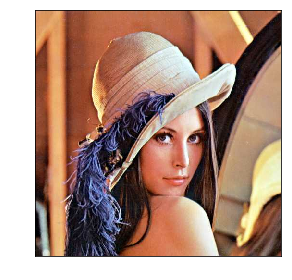

In [7]:
import os
import tensorflow as tf

from utils import plot, plot_multiple
from utils.image import load_image, display_image, augment_image
from utils.image.box_utils import *

path = os.path.join('example_data', 'images', 'lena.jpg')
# Load the image as a tf.Tensor
image = load_image(path)
print("Image shape : {} with type {}".format(image.shape, type(image)))
# Plot the image (the `plot_type = 'imshow'` is optional, now it automatically detect)
# that 3-D arrays are images
_ = plot(image)

## Example for image augmentation

For a better demonstration, I generated 4 augmented images for each color-augmentation as it is random. To ensure the augmentation occurs, I put the percentage to 100% (1.) (the 3th argument). 

The `color` transformation is the combination of the 4th transformation below. 

The `augment_image` method supports (a list of) names (the transformation's name) or `callable` (a function). 

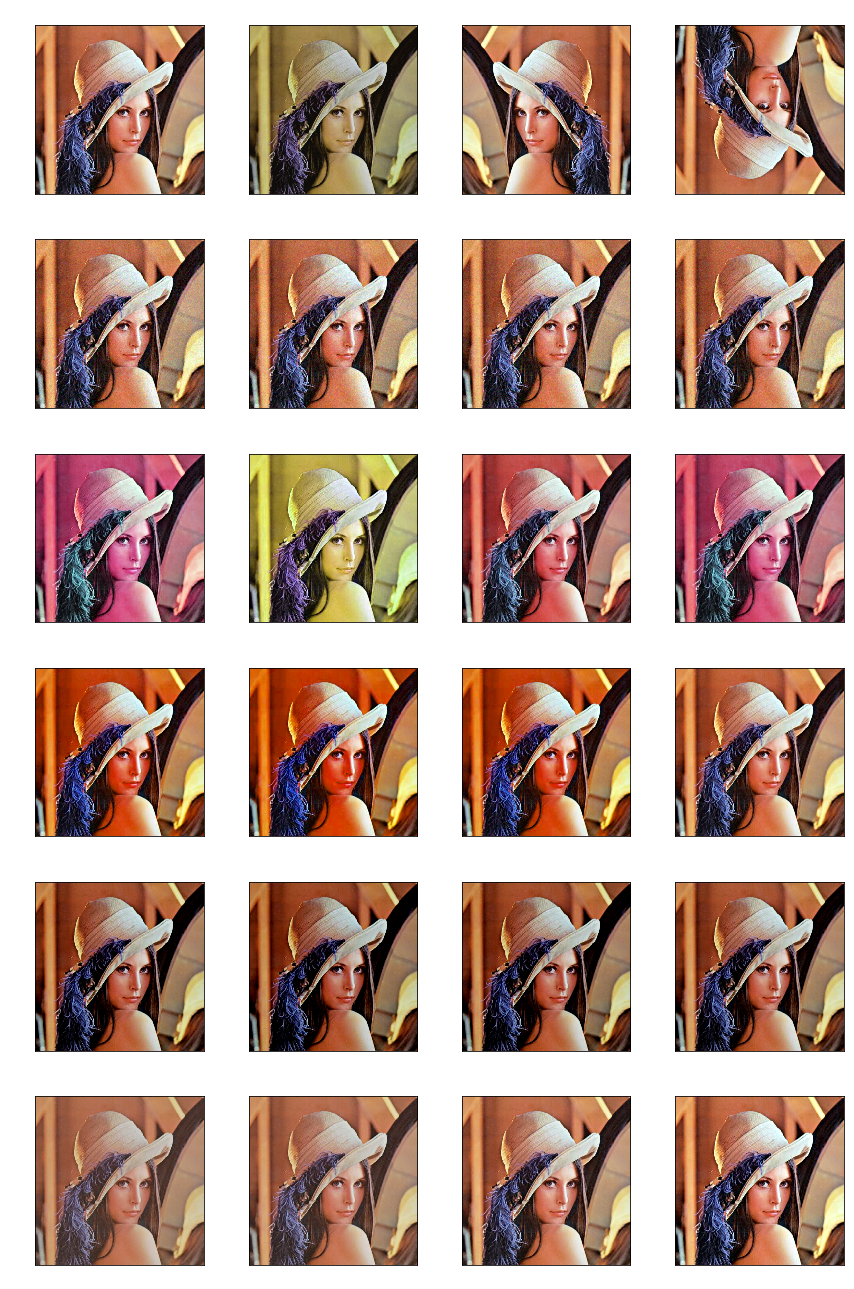

In [2]:
transformed = {
    'image' : image,
    'color' : augment_image(image, 'color', 1.),
    'flip_lr' : augment_image(image, 'flip_horizontal', 1.),
    'flip_ud' : augment_image(image, 'flip_vertical', 1.)
}
transformed.update({
    'noise_{}'.format(i) : augment_image(image, 'noise', 1.) for i in range(4)
})
transformed.update({
    'hue_{}'.format(i) : augment_image(image, 'hue', 1.) for i in range(4)
})
transformed.update({
    'saturation_{}'.format(i) : augment_image(image, 'saturation', 1.) for i in range(4)
})
transformed.update({
    'brightness_{}'.format(i) : augment_image(image, 'brightness', 1.) for i in range(4)
})
transformed.update({
    'contrast_{}'.format(i) : augment_image(image, 'contrast', 1.) for i in range(4)
})


plot_multiple(
    ** transformed, plot_type = 'imshow', size = 3, ncols = 4,
    filename = 'example_data/plots/example_augmentations.png', show = True
)


## Example for mask 

Applying masks will be shown in the next section with more interesting examples based on boxes-mask (such as keep a zone, blur it, blur background, ...) !

By default a `mask` is an array of boolean but you can *smooth* it to transform it to an arrayof values [0, 1] which represent themask intensity.

Note that the `apply_mask` method will automaticallyconvert it to an array of scalars to apply it. 

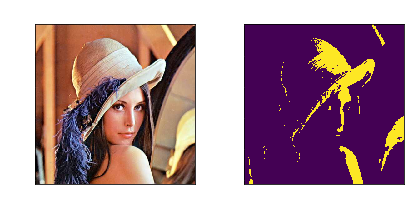

In [3]:
from utils.image.mask_utils import create_color_mask

# (255, 255, 255) is white but I reduced it to better fit
# Furthermore the 'threshold' argument allows to take variation into account
color = (225, 225, 225)
mask = create_color_mask(image, color, threshold = 50)

plot_multiple(image = image, mask = mask, plot_type = 'imshow', horizontal = True)

## Example for boxes

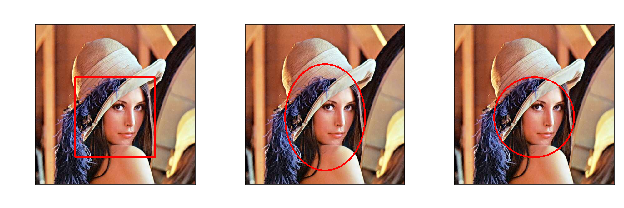

In [4]:
box = [len(image) // 4, len(image) // 3, len(image) // 2, len(image) // 2]

rectangle = draw_boxes(image, box)
ellipse   = draw_boxes(image, box, shape = ELLIPSE)
circle    = draw_boxes(image, box, shape = CIRCLE)

plot_multiple(
    rectangle = rectangle, ellipse = ellipse, circle = circle,
    plot_type = 'imshow', horizontal = True, size = 3, ncols = 3
)


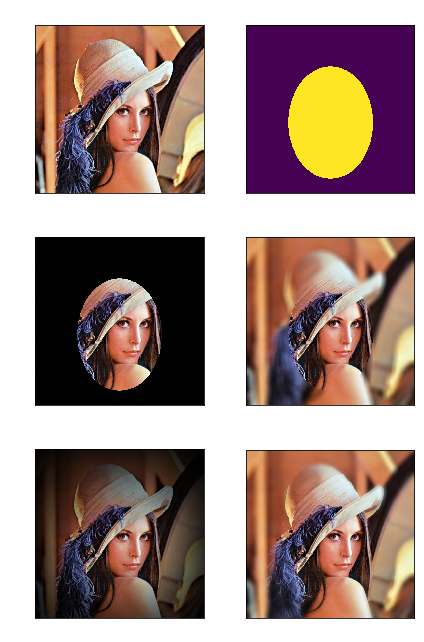

In [5]:
mask  = box_as_mask(image, box, shape = OVALE, dezoom_factor = 1.)

face  = apply_mask(image, mask, transform = 'keep')
blur  = apply_mask(image, mask, transform = 'blur', on_background = True)

smoothed_face  = apply_mask(image, mask, transform = 'keep', smooth = True, smooth_size = 0.75)
smoothed_blur  = apply_mask(image, mask, transform = 'blur', on_background = True, smooth = True)

plot_multiple(
    image = image, mask = mask, face = face, blurred = blur,
    smoothed_face = smoothed_face, smoothed_blur = smoothed_blur,
    plot_type = 'imshow', size = 3, filename = 'example_data/plots/example_mask.png', show = True
)


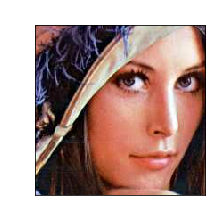

In [6]:
show_boxes(path, box, dezoom_factor = 0.75)